In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from model import Model

In [2]:
def one_hot_encode(y, classes=None):
    y = np.array(y)
    if classes is None:
        classes = np.unique(y)

    n_classes = len(classes)

    out = np.zeros((len(y), n_classes))
    for i in range(n_classes):
        out[np.argwhere(y == classes[i]), i] = 1

    return out

In [3]:
def convert_to_binary(y: np.ndarray):
    return np.array(y.argmax(axis=1))

In [4]:
# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Concatenating train and test dataset
x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

In [6]:
x = x.reshape(x.shape[0], -1) / 255
y = one_hot_encode(y)

#### Spliting the MNIST dataset into  train and test 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### Spliting train dataset into train and validation

In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

## Mini batch Gradient Descent

In [9]:
mlp1 = Model()
mlp1.add_layer(784, 256, act_fn='sigmoid')
mlp1.add_layer(256, 128, act_fn='sigmoid')
mlp1.add_layer(128, 64, act_fn='sigmoid')
mlp1.add_layer(64, 10, act_fn='softmax')
losses, accs = mlp1.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=20, batch_size=256, loss='squarederror', learning_rate=0.001)

Epoch : 0     Loss =  0.1095       Accuracy =  0.8836
Epoch : 1     Loss =  0.0663       Accuracy =  0.9156
Epoch : 2     Loss =  0.0539       Accuracy =  0.9300
Epoch : 3     Loss =  0.0470       Accuracy =  0.9391
Epoch : 4     Loss =  0.0423       Accuracy =  0.9441
Epoch : 5     Loss =  0.0389       Accuracy =  0.9479
Epoch : 6     Loss =  0.0361       Accuracy =  0.9510
Epoch : 7     Loss =  0.0337       Accuracy =  0.9539
Epoch : 8     Loss =  0.0318       Accuracy =  0.9561
Epoch : 9     Loss =  0.0306       Accuracy =  0.9587
Epoch : 10     Loss =  0.0299       Accuracy =  0.9597
Epoch : 11     Loss =  0.0293       Accuracy =  0.9608
Epoch : 12     Loss =  0.0286       Accuracy =  0.9618
Epoch : 13     Loss =  0.0282       Accuracy =  0.9631
Epoch : 14     Loss =  0.0280       Accuracy =  0.9635
Epoch : 15     Loss =  0.0274       Accuracy =  0.9645
Epoch : 16     Loss =  0.0271       Accuracy =  0.9650
Epoch : 17     Loss =  0.0261       Accuracy =  0.9657
Epoch : 18     Loss 

In [10]:
pred = mlp1.predict(x_test)
pred = convert_to_binary(pred)
test = convert_to_binary(y_test)

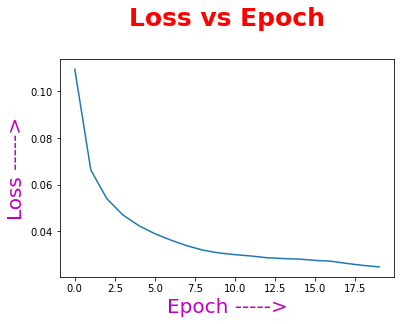

In [11]:
epoc = [i for i in range(20)]
plt.plot(epoc,losses)
plt.title("Loss vs Epoch\n", fontsize=25, fontweight='bold', color='red')
plt.xlabel("Epoch ----->", fontsize=20, color='m')
plt.ylabel("Loss ----->", fontsize=20, color='m')
plt.show()

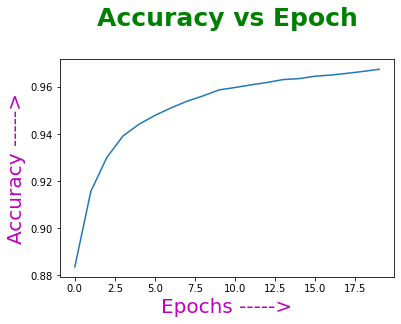

In [12]:
epoc = [i for i in range(20)]
plt.plot(epoc,accs)
plt.title("Accuracy vs Epoch\n", fontsize=25,fontweight='bold', color='green')
plt.xlabel("Epochs ----->", fontsize=20, color='m')
plt.ylabel("Accuracy ----->", fontsize=20, color='m')
plt.show()

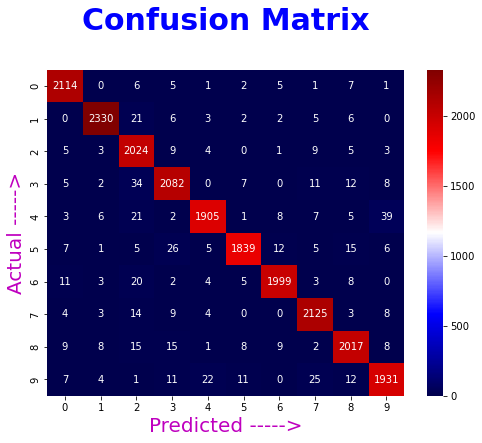

In [13]:
#Generate the confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(test, pred)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap="seismic", fmt='d')

ax.set_title('Confusion Matrix\n', fontsize=30, fontweight = 'bold', color='blue');
ax.set_xlabel('Predicted ----->', fontsize=20, color='m')
ax.set_ylabel('Actual ----->', fontsize=20, color='m');

# Visualization of the Confusion Matrix.
plt.show()

In [14]:
print('Accuracy :', format(metrics.accuracy_score(test, pred), '.2f'),'\n\n')
target=[str(i) for i in range(10)]
print(metrics.classification_report(test, pred,target_names=target))

Accuracy : 0.97 


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2142
           1       0.99      0.98      0.98      2375
           2       0.94      0.98      0.96      2063
           3       0.96      0.96      0.96      2161
           4       0.98      0.95      0.97      1997
           5       0.98      0.96      0.97      1921
           6       0.98      0.97      0.98      2055
           7       0.97      0.98      0.97      2170
           8       0.97      0.96      0.96      2092
           9       0.96      0.95      0.96      2024

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



## Batch Gradient Descent

In [15]:
mlp2 = Model()
mlp2.add_layer(784, 256, act_fn='sigmoid')
mlp2.add_layer(256, 128, act_fn='sigmoid')
mlp2.add_layer(128, 64, act_fn='sigmoid')
mlp2.add_layer(64, 10, act_fn='softmax')
losses, accs = mlp2.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=150, batch_size=x_train.shape[0], loss='squarederror', learning_rate=0.001)

Epoch : 0     Loss =  0.4853       Accuracy =  0.0989
Epoch : 1     Loss =  0.4763       Accuracy =  0.1637
Epoch : 2     Loss =  0.4695       Accuracy =  0.0984
Epoch : 3     Loss =  0.4638       Accuracy =  0.1041
Epoch : 4     Loss =  0.4591       Accuracy =  0.1591
Epoch : 5     Loss =  0.4556       Accuracy =  0.1886
Epoch : 6     Loss =  0.4531       Accuracy =  0.2417
Epoch : 7     Loss =  0.4512       Accuracy =  0.1867
Epoch : 8     Loss =  0.4497       Accuracy =  0.1694
Epoch : 9     Loss =  0.4485       Accuracy =  0.1592
Epoch : 10     Loss =  0.4474       Accuracy =  0.1590
Epoch : 11     Loss =  0.4465       Accuracy =  0.1670
Epoch : 12     Loss =  0.4458       Accuracy =  0.1757
Epoch : 13     Loss =  0.4452       Accuracy =  0.2306
Epoch : 14     Loss =  0.4446       Accuracy =  0.2810
Epoch : 15     Loss =  0.4442       Accuracy =  0.2840
Epoch : 16     Loss =  0.4436       Accuracy =  0.2669
Epoch : 17     Loss =  0.4429       Accuracy =  0.2478
Epoch : 18     Loss 

Epoch : 149     Loss =  0.1083       Accuracy =  0.8894


In [16]:
pred = mlp2.predict(x_test)
pred = convert_to_binary(pred)
test = convert_to_binary(y_test)

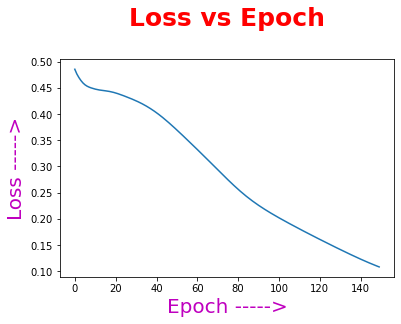

In [17]:
epoc = [i for i in range(150)]
plt.plot(epoc,losses)
plt.title("Loss vs Epoch\n", fontsize=25, fontweight='bold', color='red')
plt.xlabel("Epoch ----->", fontsize=20, color='m')
plt.ylabel("Loss ----->", fontsize=20, color='m')
plt.show()

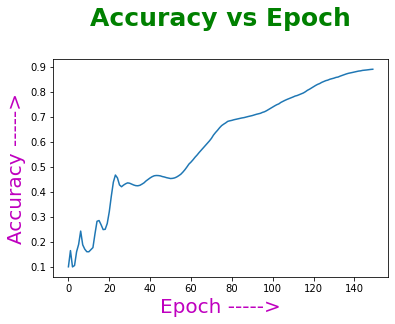

In [18]:
epoc = [i for i in range(150)]
plt.plot(epoc,accs)
plt.title("Accuracy vs Epoch\n", fontsize=25, fontweight='bold', color='green')
plt.xlabel("Epoch ----->", fontsize=20, color='m')
plt.ylabel("Accuracy ----->", fontsize=20, color='m')
plt.show()

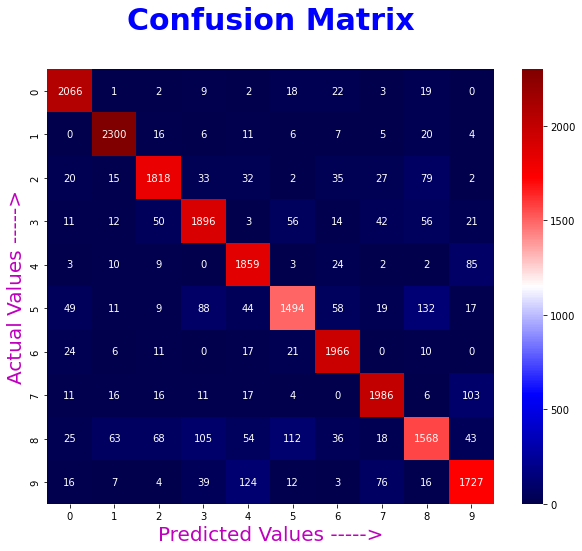

In [19]:
#Generate the confusion matrix
fig, ax = plt.subplots(figsize=(10,8))
cf_matrix = confusion_matrix(test, pred)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='seismic', fmt='d')

ax.set_title('Confusion Matrix\n', fontsize=30, fontweight='bold', color='b');
ax.set_xlabel('Predicted Values ----->', fontsize=20, color='m')
ax.set_ylabel('Actual Values ----->', fontsize=20, color='m');

plt.show()

In [20]:
print('Accuracy :', format(metrics.accuracy_score(test, pred), '.2f'),'\n\n')
target=[str(i) for i in range(10)]
print(metrics.classification_report(test, pred,target_names=target))

Accuracy : 0.89 


              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2142
           1       0.94      0.97      0.96      2375
           2       0.91      0.88      0.89      2063
           3       0.87      0.88      0.87      2161
           4       0.86      0.93      0.89      1997
           5       0.86      0.78      0.82      1921
           6       0.91      0.96      0.93      2055
           7       0.91      0.92      0.91      2170
           8       0.82      0.75      0.78      2092
           9       0.86      0.85      0.86      2024

    accuracy                           0.89     21000
   macro avg       0.89      0.89      0.89     21000
weighted avg       0.89      0.89      0.89     21000



## SGD

In [21]:
mlp2 = Model()
mlp2.add_layer(784, 256, act_fn='sigmoid')
mlp2.add_layer(256, 128, act_fn='sigmoid')
mlp2.add_layer(128, 64, act_fn='sigmoid')
mlp2.add_layer(64, 10, act_fn='softmax')
losses, accs = mlp2.fit(x_train, y_train, validate_x=x_valid, validate_y=y_valid,
                       epochs=2, batch_size= 1, loss='squarederror', learning_rate=0.001)

Epoch : 0     Loss =  0.0420       Accuracy =  0.9444
Epoch : 1     Loss =  0.0367       Accuracy =  0.9519


In [22]:
pred = mlp2.predict(x_test)
pred = convert_to_binary(pred)
test = convert_to_binary(y_test)

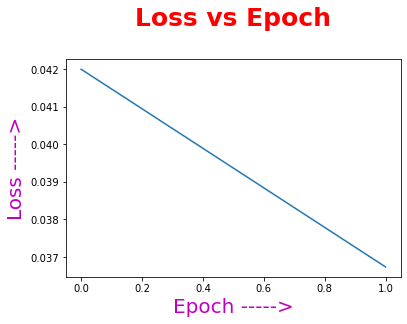

In [23]:
epoc = [i for i in range(2)]
plt.plot(epoc,losses)
plt.title("Loss vs Epoch\n", fontsize=25, fontweight='bold', color='red')
plt.xlabel("Epoch ----->", fontsize=20, color='m')
plt.ylabel("Loss ----->", fontsize=20, color='m')
plt.show()

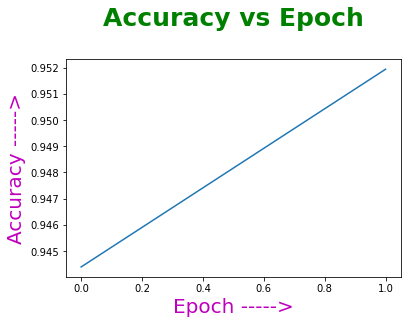

In [24]:
epoc = [i for i in range(2)]
plt.plot(epoc,accs)
plt.title("Accuracy vs Epoch\n", fontsize=25, fontweight='bold', color='green')
plt.xlabel("Epoch ----->", fontsize=20, color='m')
plt.ylabel("Accuracy ----->", fontsize=20, color='m')
plt.show()

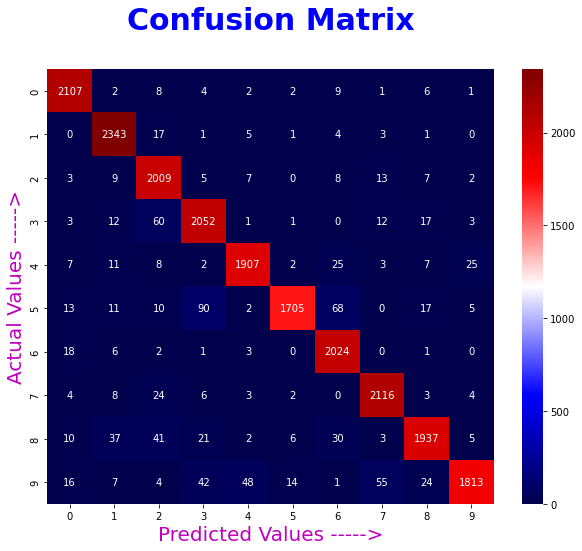

In [25]:
#Generate the confusion matrix
fig, ax = plt.subplots(figsize=(10,8))
cf_matrix = confusion_matrix(test, pred)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='seismic', fmt='d')

ax.set_title('Confusion Matrix\n', fontsize=30, fontweight='bold', color='b');
ax.set_xlabel('Predicted Values ----->', fontsize=20, color='m')
ax.set_ylabel('Actual Values ----->', fontsize=20, color='m');

plt.show()

In [26]:
print('Accuracy :', format(metrics.accuracy_score(test, pred), '.2f'),'\n\n')
target=[str(i) for i in range(10)]
print(metrics.classification_report(test, pred,target_names=target))

Accuracy : 0.95 


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2142
           1       0.96      0.99      0.97      2375
           2       0.92      0.97      0.95      2063
           3       0.92      0.95      0.94      2161
           4       0.96      0.95      0.96      1997
           5       0.98      0.89      0.93      1921
           6       0.93      0.98      0.96      2055
           7       0.96      0.98      0.97      2170
           8       0.96      0.93      0.94      2092
           9       0.98      0.90      0.93      2024

    accuracy                           0.95     21000
   macro avg       0.95      0.95      0.95     21000
weighted avg       0.95      0.95      0.95     21000

